### 선형회귀와 경사하강법의 학습 방법
모델의 최적화된 방법을 찾도록 도움을 주는 것  
가중차와 절편을 사용해 최적화된 모델을 찾아주는 것 -> 경사하강법 + 선형 회귀  
SGD(Stochastic Gradient Descent)가 가중차와 절편을 이용해 오차(절대값, 제곱)를 줄여야 정담에 가까워짐  
경사하강법을 사용하지 않는다면 모든 경우의 수를 다 찾아야 한다.  

#### 선형 회귀식의 가중치(w)와 절편(bias) => Y=wX+b  
머신러닝/딥러닝의 학습이란? 데이터를 계속 업데이트 하면서 모델에 적용시키면서 오차가 가장 적은 것을 기준으로 가중치와 절편을 찾는 것.  
규칙이란? 가중치와 절편을 계속 업데이터 하는 것.  
규제란? 과대적합 방지하기 위해 가중치와 절편을 줄이는 것.  



### 당뇨병 환자 데이터

In [65]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [66]:
# 데이터의 크기 확인하기
print(diabetes.data.shape) # 문제
print(diabetes.target.shape) # 정답

(442, 10)
(442,)


In [67]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [68]:
# data의 일부보기
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [69]:
# target의 일부보기
diabetes.target[0:3]

array([151.,  75., 141.])

In [70]:
# 당뇨병 환자 데이터 시각화 하기(data의 3번째 Feature)
import matplotlib.pyplot as plt

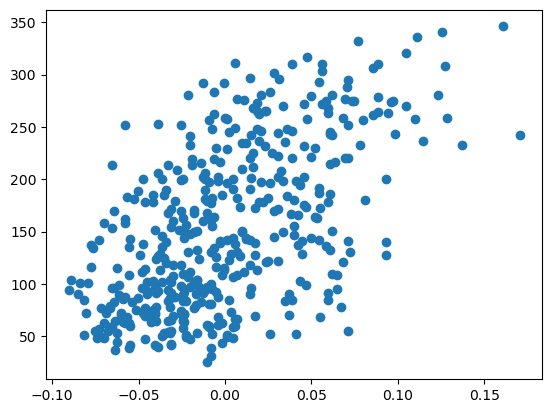

In [71]:
plt.scatter(
    diabetes.data[:,2],
    diabetes.target
)

plt.show()

In [72]:
# 상관 계수
import numpy as np

In [73]:
np.corrcoef(diabetes.data[:,2], diabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

---
### 경사 하강법
: 경사 하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘  

#### 예측값과 변화율
변화율 = 0: 최적화된 모델(Y-Y^ = 0) -> 변화율(기울기) = 0  

#### 예측값(Y^)
예측값은 하나의 모델에서 수식의 결과로 나온 값을 의미
예측값이 정답값으로 수렴해야 한다.  

#### 훈련데이터에서 잘 맞는 w와 b를 찾는 방법 
1. 무작위로 w와 b를 정한다.  
2. x에서 샘플 하나를 선택하여 y^을 계산한다.  
3. y^과 선택한 샘플의 진짜 y를 비교한다. (예측값과 정답 비교하기: 오차 구하기)  
4. y^이 y와 가까워지도록 w, b를 조정한다. (모델 조정하기: 학습하기)  
5. 모든 샘플을 처리할 때 까지 2~4항목을 반복한다.  


In [74]:
# 훈련데이터의 Feature와 Target 정하기
x = diabetes.data[:,2]
y = diabetes.target

# 5개만 출력해보기
print(x[:5])
print(y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [75]:
# w와 b를 초기화 하기: 무작위로
w = 1
b = 1

In [76]:
# 훈련데이터의 첫번째 샘플로 y^ 계산하기
y_hat = x[0] * w + b
y_hat

1.0616962065186832

In [77]:
# Target과 예측 데이터 비교하기
print(y_hat)
print(y[0])

1.0616962065186832
151.0


> 당연한 결과지만 Target과 예측값의 너무 많은 차이가 발생

In [78]:
# w와 b를 조금씩 변경해서 y_hat이 증하가는지 감소하는지 살펴보기
# 기존 w에 0.1만 증가해 보기
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc


1.0678658271705517

In [79]:
# w값 조정한 후 예측값 정도# 확인하기
# w가 0.1 증가했을 때, y_hat이 얼마나 증가했는지 계산해보기(변화율 확인하기)
w_rate = (y_hat_inc - y_hat) / 0.1
w_rate


0.06169620651868435

In [80]:
# 0.1 -> 0.2
w_inc = w + 0.2
y_hat_inc = w_inc * x[0] + b

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868325

> w_rate(변화율)이 x[0]의 값과 동일하다.

In [81]:
# 변화율을 확인했으니 다시 훈련데이터의 1번값으로 변화율을 구해보자

w=b=1
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) /  (w_inc - w)
w_rate


0.06169620651868429

In [82]:
# 변화율로 가중치 업데이트 <- 학습하기
w_new = w + w_rate
w_new

1.0616962065186843

In [83]:
# 변화율로 절편 업데이트 <- 학습하기
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

1.1616962065186833


In [84]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

In [85]:
b_new = b + 1
b_new

2

### 오차 역전파(backpropagation)

In [86]:
# 오차 역전파로 가중치와 절편을 업데이트 한다. -> 손실함수(비용함수)를 구성한다.
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)


10.250624555903848 150.9383037934813


In [87]:
# 2번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [88]:
# 반복문을 통해 저체 샘플을 반복하기
w = b = 1
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


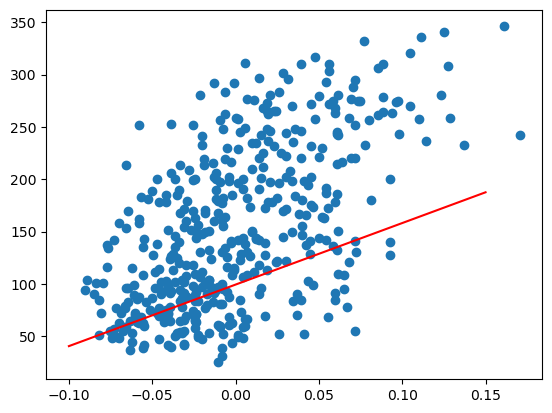

In [89]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    'r'
)

plt.show()


In [90]:
# Epoch로 반복하기: w와 b를 반복적으로 계산해보기

w = b = 1
for _ in range(300):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


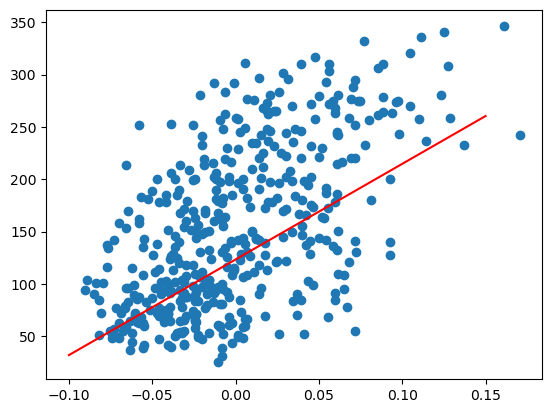

In [91]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    'r'
)

plt.show()


In [92]:
# 모델로 예측해보기)913.5973364346786 123.39414383177173)
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643900139

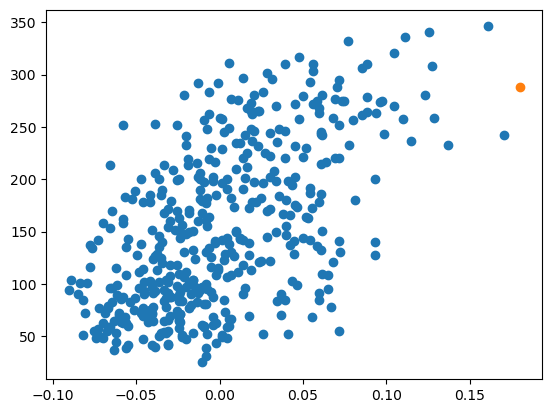

In [93]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.show()

---
#### 모델 만들기 정리
1. w와 b를 임의의 값(1,1)로 초기화 하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다.
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트 한다(학습한다).
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트가 된다.
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b는 더 커지도록 업데이트 된다.

### 선형회귀를 위한 Class 만들기

In [94]:
class LRModel:
    # 초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치의 초기화
        self.b = 1.0 # 절편의 초기화

    # 정방향 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b # 직선 방정식
        return y_hat
    
    # 역방향 계산
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레디언트를 계산
        b_grad = 1 * err # 절편에 대한 그레
        return w_grad, b_grad

    # 훈련
    def fit(self, x, y, epoch):
        for _ in range(epoch):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = y_i - y_hat
                w_grad, b_grad = self.backprop(x_i, err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b




In [95]:
lrmodel = LRModel()
w,b = lrmodel.fit(x, y, 100)
print(w, b)

913.5973364346786 123.39414383177173


---
### 선형회귀
선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있다.  
머신러닝 알고리즘이지만 딥러닝에서 사용하는 인공신경망의 알고리즘의 기초가 된다.  
선형회귀 -> Logistic Regression -> 인공신경망 -> Deep Learning